In [26]:
#import the packges needed for the analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
##from warnings import filterwarnings

In [27]:
#location and retrieval of our dataset (trips) 

filename = "trips.csv"

df_trips = pd.read_csv(filename, index_col= 0)

In [28]:
#data clean-up
df_trips.loc[(df_trips.trip_distance<0), 'trip_distance'] = 0

df_trips.loc[(df_trips.fare_amount<0), 'fareamount'] = 0

df_trips.loc[(df_trips.extra<0), 'extra'] = 0

df_trips.loc[(df_trips.mta_tax<0),'mta_tax'] = 0

df_trips.loc[(df_trips.tip_amount<0), 'tip_amount'] = 0

df_trips.loc[(df_trips.tolls_amount<0), 'tolls_amount'] = 0

df_trips.loc[(df_trips.improvement_surcharge<0), 'improvement_surcharge'] = 0

df_trips.loc[(df_trips.total_amount<0), 'total_amount'] = 0

df_trips.loc[(df_trips.congestion_surcharge<0), 'congestion_surcharge'] = 0

df_trips.loc[(df_trips.passenger_count<0), 'passenger_count'] = 0





df_trips

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,fareamount
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,NaN
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,NaN
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,NaN
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,NaN
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.0,2020-01-01 14:08:46,2020-01-01 14:19:08,3.0,1.7,1.0,N,186,162,2.0,9.0,2.5,0.5,0.00,0.0,0.3,12.30,2.5,NaN
99996,1.0,2020-01-01 14:21:39,2020-01-01 14:25:46,2.0,0.9,1.0,N,229,141,1.0,5.0,2.5,0.5,1.65,0.0,0.3,9.95,2.5,NaN
99997,1.0,2020-01-01 14:38:26,2020-01-01 14:42:29,1.0,0.8,1.0,N,263,75,1.0,5.0,2.5,0.5,0.83,0.0,0.3,9.13,2.5,NaN
99998,1.0,2020-01-01 14:48:55,2020-01-01 14:58:39,1.0,1.4,1.0,N,236,161,1.0,9.0,2.5,0.5,1.70,0.0,0.3,14.00,2.5,NaN


In [29]:
#setting the limit for passenger count column to ensure the values do not exceed 6
mask = df_trips['passenger_count']<=6

df_trips = df_trips[mask]

In [30]:
# creating new data frames to assess the dataset more aptly before concating them together for analysis and visualization late night(22:00 to 04:00), morning (04:00 to 10:00), midday (10:00 to 16:00)

df_trips['tpep_pickup_datetime'] = pd.to_datetime(df_trips['tpep_pickup_datetime'])
df_trips['tpep_dropoff_datetime'] = pd.to_datetime(df_trips['tpep_dropoff_datetime'])

df_trips['hr_pickup'] = df_trips['tpep_pickup_datetime'].dt.hour

df_trips['hr_dropoff'] = df_trips['tpep_dropoff_datetime'].dt.hour

#creating the late night dataframe 
latenight_1 = df_trips.loc[(df_trips['hr_pickup']>=22) & (df_trips['hr_dropoff']<4)]

latenight_2 = df_trips.loc[(df_trips['hr_pickup']<4)]

latenight = pd.concat([latenight_1, latenight_2])

latenight['classification'] = 'late_night'

#morning hours dataframe

morning_hours = df_trips.loc[(df_trips['hr_pickup'] >=4) & (df_trips['hr_pickup']<10)]

morning_hours = morning_hours.loc[(morning_hours['hr_dropoff']>=4) &(morning_hours['hr_dropoff']<10)]

morning_hours['classification'] = 'morning hours'


#creating midday hours dataframe


midday_hours = df_trips.loc[(df_trips['hr_pickup']>=10) & df_trips['hr_pickup']<16]

midday_hours = midday_hours.loc[(midday_hours['hr_dropoff']>=10) & (midday_hours['hr_dropoff']<16)]

midday_hours['classification'] = 'midday hours'

#concating all of the dataframes together
timezoned_trips = pd.concat([latenight, morning_hours])

timezoned_trips = pd.concat([timezoned_trips, midday_hours])

timezoned_trips


C:\Users\Pitah\AppData\Local\Temp/ipykernel_13168/4075608723.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trips['tpep_pickup_datetime'] = pd.to_datetime(df_trips['tpep_pickup_datetime'])
C:\Users\Pitah\AppData\Local\Temp/ipykernel_13168/4075608723.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trips['tpep_dropoff_datetime'] = pd.to_datetime(df_trips['tpep_dropoff_datetime'])
C:\Users\Pitah\AppData\Local\Temp/ipykernel_13168/4075608723.py:6: SettingWithCopyWarning: 
A value is trying to be 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,fareamount,hr_pickup,hr_dropoff,classification
1276,2.0,2019-12-31 23:59:40,2020-01-01 00:09:06,2.0,2.19,1.0,N,231,158,1.0,...,0.5,2.66,0.0,0.3,15.96,2.5,NaN,23,0,late_night
1419,2.0,2019-12-31 23:56:19,2020-01-01 00:15:43,1.0,3.74,1.0,N,162,158,1.0,...,0.5,5.64,0.0,0.3,24.44,2.5,NaN,23,0,late_night
2087,2.0,2019-12-31 23:59:24,2020-01-01 00:00:47,6.0,0.07,1.0,N,263,263,2.0,...,0.5,0.00,0.0,0.3,6.80,2.5,NaN,23,0,late_night
2455,2.0,2019-12-31 23:57:54,2020-01-01 00:09:23,1.0,1.75,1.0,N,211,4,1.0,...,0.5,8.00,0.0,0.3,21.30,2.5,NaN,23,0,late_night
2482,2.0,2019-12-31 23:58:53,2020-01-01 00:25:44,1.0,20.98,1.0,N,132,25,1.0,...,0.5,14.32,0.0,0.3,71.62,0.0,NaN,23,0,late_night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.0,2020-01-01 14:08:46,2020-01-01 14:19:08,3.0,1.70,1.0,N,186,162,2.0,...,0.5,0.00,0.0,0.3,12.30,2.5,NaN,14,14,midday hours
99996,1.0,2020-01-01 14:21:39,2020-01-01 14:25:46,2.0,0.90,1.0,N,229,141,1.0,...,0.5,1.65,0.0,0.3,9.95,2.5,NaN,14,14,midday hours
99997,1.0,2020-01-01 14:38:26,2020-01-01 14:42:29,1.0,0.80,1.0,N,263,75,1.0,...,0.5,0.83,0.0,0.3,9.13,2.5,NaN,14,14,midday hours
99998,1.0,2020-01-01 14:48:55,2020-01-01 14:58:39,1.0,1.40,1.0,N,236,161,1.0,...,0.5,1.70,0.0,0.3,14.00,2.5,NaN,14,14,midday hours


C:\Users\Pitah\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='classification', ylabel='count'>

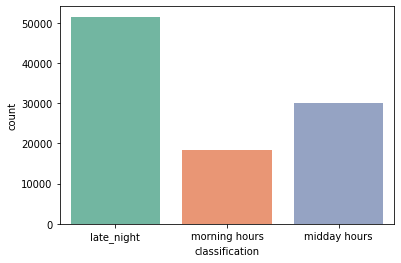

In [31]:
# A count plot showing the distribution of our specified timezones

sns.countplot(timezoned_trips['classification'], palette = "Set2")

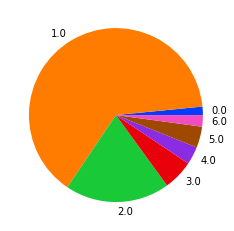

In [32]:
passengercount = df_trips.groupby('passenger_count')['VendorID'].count().reset_index()

passengercount.rename(columns = {'VendorID':'Number of occurrences'}, inplace = True)

#Visualization - a chart passenger count distribution

colors = sns.color_palette('bright')[0:8]

plt.pie(passengercount['Number of occurrences'],labels = passengercount['passenger_count'],colors = colors)

plt.show()

<AxesSubplot:xlabel='trip_distance', ylabel='total_amount'>

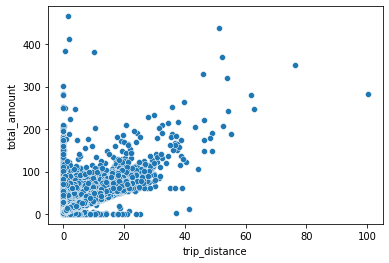

In [33]:
scatter_plotting = df_trips[['trip_distance', 'total_amount']]

sns.scatterplot(data = scatter_plotting, x = 'trip_distance' , y = 'total_amount')